In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import numpy as np
import pandas as pd
plt.style.use('bmh')

<ipython-input-1-500e47f8ccc9>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [12]:
df1 = pd.read_csv("../Datasets/SBIN-EQ_1m_6months.csv")
df1.head(2)

,Date,SBIN-EQ O,SBIN-EQ H,SBIN-EQ L,SBIN-EQ C,SBIN-EQ V
0,01-11-21 15:29,283.10,283.20,282.80,283.05,62812
1,01-11-21 15:28,283.15,283.35,282.95,283.10,112867


In [4]:
days =list() 
PrevCloses =list()
Opens = list()
Closes = list()
df_days = df2.loc[:,'Date']
df_PrevCloses = df2.loc[:,'PrevClose']
df_Opens = df2.loc[:,'Open']
df_Closes = df2.loc[:,'Close']

In [5]:
for day in df_days:
    days.append( int(day.split('-')[0]))

In [6]:
for preClose in df_PrevCloses:
    PrevCloses.append(preClose)

In [7]:
for Open in df_Opens:
     Opens.append(Open)

In [8]:
for Close in df_Closes:
    Closes.append(Close)

In [9]:
df3 = pd.DataFrame({'Date':days,'PrevClose':PrevCloses,'Open':Opens,'Close':Closes})
df3.head(3)

,Date,PrevClose,Open,Close


In [15]:
x = df3[['Date','PrevClose','Open']].values
y = df3[['Close']].values

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.02)

In [17]:
x_train

array([[ 24.  , 342.2 , 341.85],
       [ 10.  , 260.95, 258.  ],
       [ 24.  , 192.45, 194.8 ],
       ...,
       [  3.  , 338.5 , 341.  ],
       [ 27.  , 303.5 , 305.25],
       [  9.  , 312.8 , 313.95]])

In [18]:
print("x_train has",x_train.shape,"Shape")
print("y_train has",y_train.shape,"Shape")
print("x_test has",x_test.shape,"Shape")
print("y_test has",y_test.shape,"Shape")

x_train has (486, 3) Shape
y_train has (486, 1) Shape
x_test has (10, 3) Shape
y_test has (10, 1) Shape


In [1]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()

In [20]:
LinearRegression = LinearRegression.fit(x_train,y_train)

In [21]:
print(LinearRegression.coef_)
print(LinearRegression.intercept_)

[[0.02309772 0.07377381 0.92123755]]
[0.43319151]


In [22]:
PredictionOfTest = LinearRegression.predict(x_test)

In [23]:
dframe = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':PredictionOfTest.flatten()})
dframe.head()

,Actual,Predicted
0,342.20,351.325538
1,271.10,266.838943
2,158.20,159.671780
3,240.20,231.356933
4,204.05,207.480834


In [24]:
from sklearn import metrics
MAE = print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,PredictionOfTest))
MSE = print('Mean Squred Error:', metrics.mean_squared_error(y_test,PredictionOfTest))
RMSE= print('Root Mean Squred Error:', np.sqrt(metrics.mean_squared_error(y_test,PredictionOfTest)))
accuracy = LinearRegression.score(x_test,PredictionOfTest) 
print('accuracy score: ',accuracy*100,'%')

Mean Absolute Error: 5.226514641334598
Mean Squred Error: 33.11336280286538
Root Mean Squred Error: 5.7544211527194795
accuracy score:  100.0 %


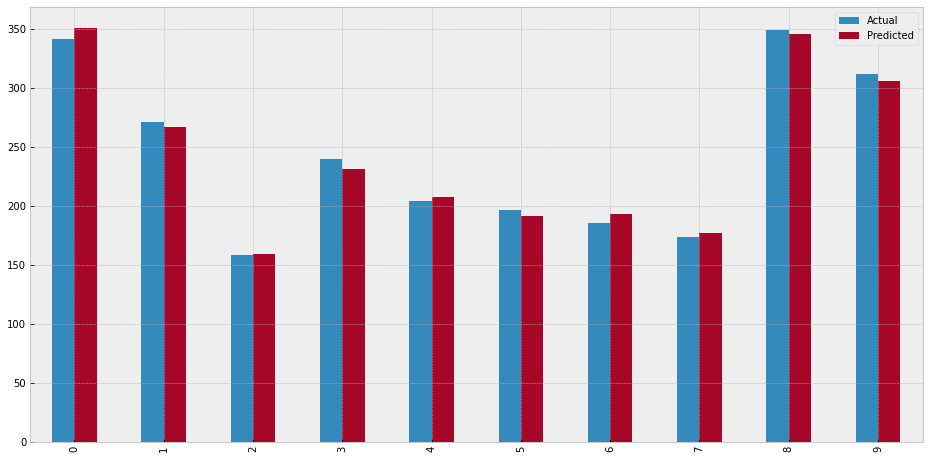

In [25]:
import math
graph = dframe.head(10)
graph.plot(kind='bar',figsize=(16,8))

In [26]:
PredictionOfAll = LinearRegression.predict(x)

In [27]:
dframe2 = pd.DataFrame({'Actual':y.flatten(),'Predicted':PredictionOfAll.flatten()})
dframe2.head(5)

,Actual,Predicted
0,291.10,293.949683
1,297.65,291.094625
2,296.30,299.892212
3,305.30,294.979218
4,305.30,305.062903


In [28]:
from sklearn import metrics
MAE = print('Mean Absolute Error:', metrics.mean_absolute_error(y,PredictionOfAll))
MSE = print('Mean Squred Error:', metrics.mean_squared_error(y,PredictionOfAll))
RMSE= print('Root Mean Squred Error:', np.sqrt(metrics.mean_squared_error(y,PredictionOfAll)))

Mean Absolute Error: 4.391010424477283
Mean Squred Error: 35.72200618198626
Root Mean Squred Error: 5.9767889524381115


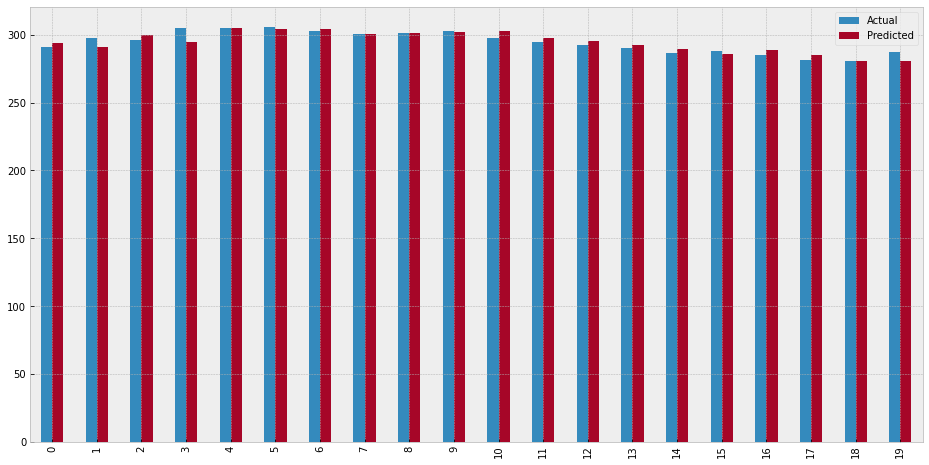

In [29]:
import math
graph = dframe2.head(20)
graph.plot(kind='bar',figsize=(16,8))

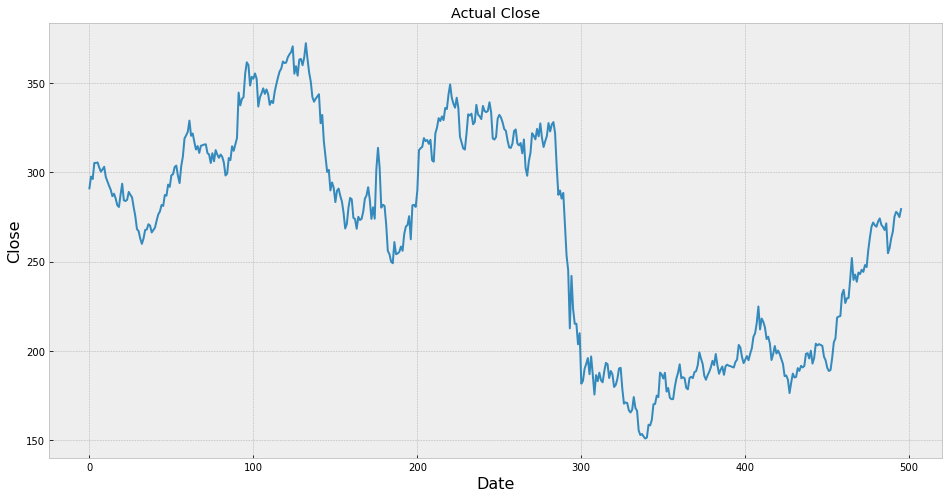

In [30]:
plt.figure(figsize=(16,8))
plt.title('Actual Close')
plt.plot(df3['Close'])
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close',fontsize=16)
plt.show()

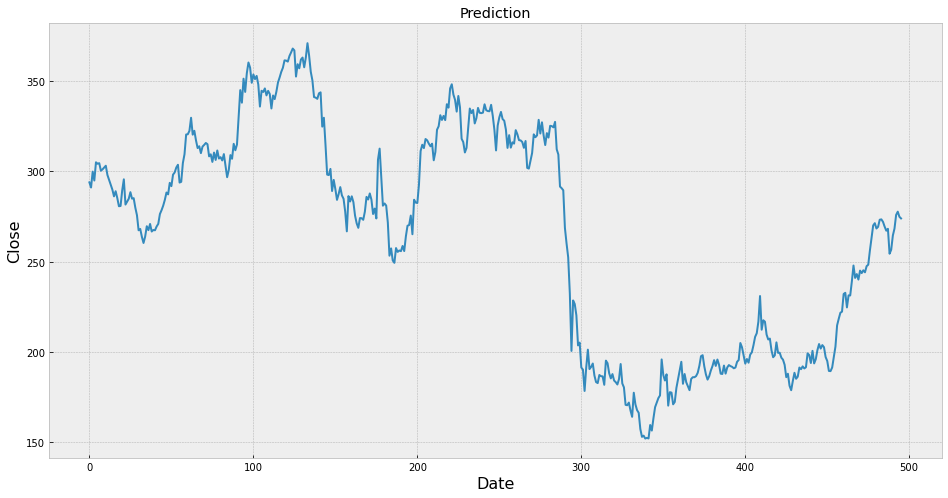

In [31]:
pred = pd.DataFrame({'PredictionOfAll':PredictionOfAll.flatten()})
pred = pred[['PredictionOfAll']]
plt.figure(figsize=(16,8))
plt.title('Prediction')
plt.plot(pred)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close',fontsize=16)
plt.show()

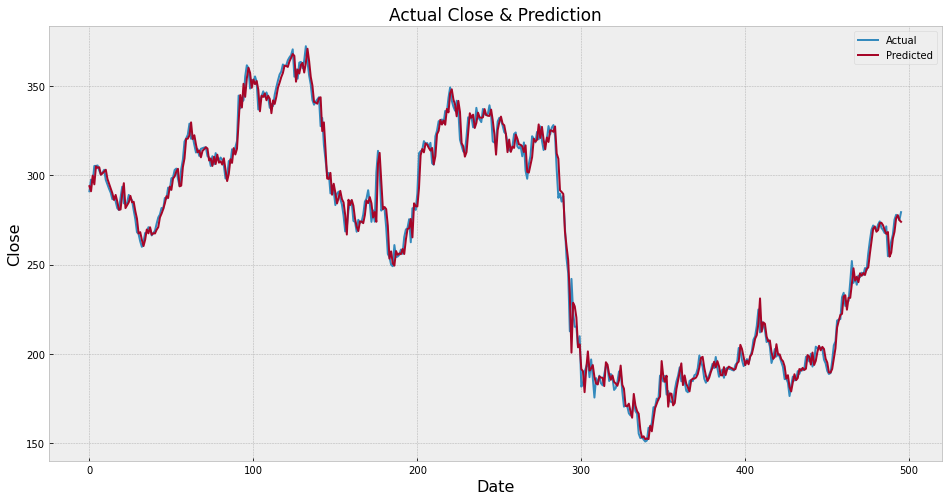

In [32]:
plt.figure(figsize=(16,8))
plt.title('Actual Close & Prediction',fontsize=17)
plt.plot(df3['Close'])
plt.plot(PredictionOfAll)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close',fontsize=16)
plt.show()

In [44]:
Index = [0]
df4 = pd.DataFrame({'Index':Index,'Date':2,'PrevClose':279.4,'Open':279.4})
forecast = df4[['Date','PrevClose','Open']].values

In [45]:
LinearRegression.predict(forecast)

array([[278.485559]])

In [46]:
df3.tail(1)

,Date,PrevClose,Open,Close
495,1,274.95,274.9,279.4
